<a href="https://colab.research.google.com/github/shreekrishh/Quant/blob/main/Outliers/Outliers_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**READ THE INSTRUCTIONS**

##**Importing Necessary Modules**
##### Note that you are not permitted to import or use any other libraries other than what are imported here

In [ ]:
## Run this cell if you are using on colab else skip it
## Make sure you have the folder "My Drive/Coding Challenge/Python" in your drive folders with the provided "quant_club_test_utils.py" file

from google.colab import drive
import sys

In [ ]:
## Mouting Quant Club's utility functions which are to be used in this Assignment

drive.mount('/content/gdrive/')
sys.path.append('/content/gdrive/My Drive/Coding Challenge/Python/')
from quant_club_test_utils import read_csv_with_index, plot_anomaly, make_and_save_data_file

Mounted at /content/gdrive/


##**Generating Sample Data with outliers**
##### If you are running the notebook for the first time, use "make_and_save_data_file" utility function to generate the csv data file in your drive folder
##### **Warning : Run this code only once in the begining, runnning it multiple times will result in mutiple files with different data. In case you want to recreate the data, delete the earlier data file first**

In [ ]:
help(make_and_save_data_file)

Help on function make_and_save_data_file in module quant_club_test_utils:

make_and_save_data_file(working_on='Colab')
    This function creates the data file and saves it in your drive folder.
    It returns the name of the saved file: which is "testfile + UNIX time stamp"
    
    Parameters:
      working_on : 'Colab' or 'Local' , if working on Colab or Local
                    The default value is Colab.



Plot of the Generated Data


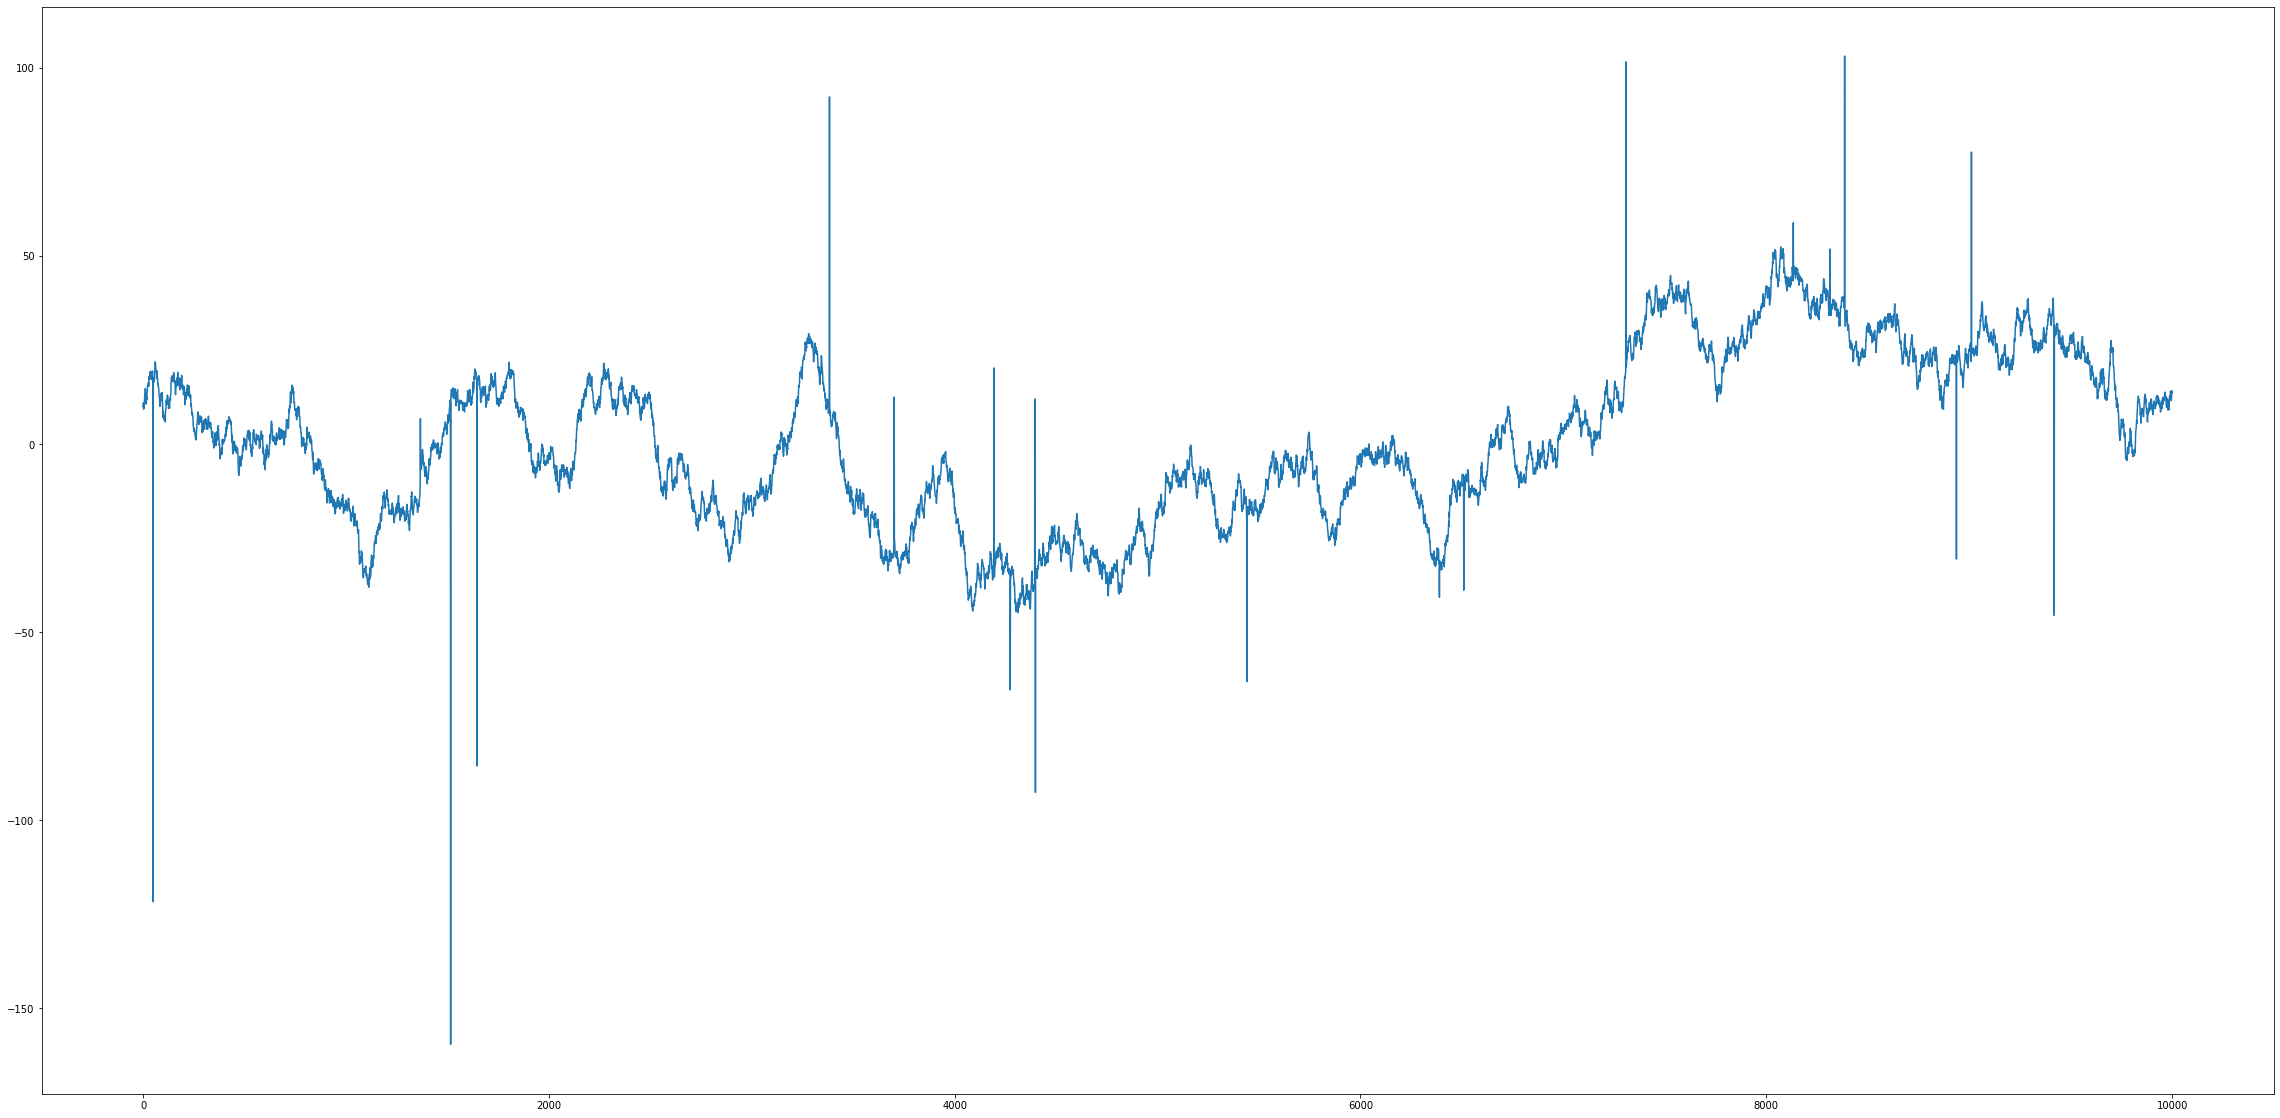

In [ ]:
## To generate and save the file in your drive automatically, execute this cell once
my_file = make_and_save_data_file(working_on = 'Colab')

##**Loading the generated data file**
##### Use "read_csv_with_index" utility function to load the datafile generated in the previous section and return it as a python dictionary


In [ ]:
# In case you have already generated the data file, please provide the filename in the my_file variable just below, else if you are using freshly created file comment it out

# my_file = 'Your input Filename'
my_file = '/content/gdrive/My Drive/Coding Challenge/' + my_file

In [ ]:
help(read_csv_with_index)

Help on function read_csv_with_index in module quant_club_test_utils:

read_csv_with_index(file_name, size=None)
    Input:
        file_name : name of file with extension
        size : how many points to read. The default value is None.
    
    Output:
        Return a dictionary with time and value as its keys.



In [ ]:
DataDict = read_csv_with_index(file_name = my_file)

#**Outlier Detection**
##### This is where you have to code. You have 3 parts in this assignment. The first two parts are compulsory. The third part is optional.

## Method 1 - Bollinger Bands

In [ ]:
def bollinger_bands():
  mean=[None,DataDict['value'][0]]
  SD=[None,0]
  x = 5
  n = 10
  l=len(DataDict['time'])
  anomaly=[]
  
  thresup=[]
  threslow=[]
  for i in range(2, n) :
    mean.append(sum(DataDict['value'][:i])/(i))  
    squares_ka_sum=0
    for j in range(i):
      squares_ka_sum += (DataDict['value'][j] - mean[i])**2
   
    SD.append((squares_ka_sum/(i-1))**0.5)
              
  for i in range(n,l):
    mean.append(sum(DataDict['value'][(i-n):(i)])/n)
    squares_ka_sum=0
    for j in range(i-n,i):
      squares_ka_sum += (DataDict['value'][j] - mean[i])**2
    SD.append(((squares_ka_sum)/(n-1)) ** 0.5)
   
  for i in range(1,l):
    if DataDict['value'][i] > (mean[i] + x*SD[i])   or   DataDict['value'][i] < (mean[i] - x*SD[i])  :
      anomaly.append(i)                  

  return anomaly

 


## Method 2 - Slope Distribution

In [ ]:
##title Default title text
def slope_dis():
  slope=[DataDict['value'][1]-DataDict['value'][0]]
  #slope=[]
  l=len(DataDict['time'])
  x=3.5
  anomaly=[]
 
  for i in range(2,l):
    slope.append(DataDict['value'][i]-DataDict['value'][i-1])
    mean= sum(slope[:i])/i
    square_ka_sum=0
    for j in range(i):
      square_ka_sum += (slope[j] - mean)**2
    SD= (square_ka_sum/(i-1))**0.5
    if slope[i-1] > (mean+x*SD) or slope[i-1] < (mean-x*SD):
      anomaly.append(i)
  return anomaly







## Method 3 - Your Method

In [ ]:
## Your Code Goes Here           
## BOXPLOT ANATOMY (INTERQUARTILE RANGE)
def Boxplot_Anatomy():
  anomaly=[]
  n=20
  l=len(DataDict['time'])
  
  for i in range(n,l):
    data=[]
    for j in range(i-n,i):
      data.append(DataDict['value'][j])
    data.sort()
    median=((data[9]+data[10])/2)
    IQR=data[15]-data[5]
    threslow=data[5]-(5*IQR)
    thresup=data[15]+(5*IQR)
    if DataDict['value'][i]>thresup or DataDict['value'][i]<threslow:
      anomaly.append(i)
  return anomaly


## Use the method to get the index/times where we have anomalies in the list "anomaly_times"

In [ ]:
## call your method here which returns the list of times/index where there is anomaly
anomaly_times=Boxplot_Anatomy()
print(DataDict['value'])
print(anomaly_times)


 


[10.0, 10.59, 10.95, 9.25, 9.43, 9.91, 10.85, 12.2, 12.78, 13.24, 13.0, 14.73, 14.26, 13.08, 12.43, 11.27, 10.6, 12.65, 11.69, 12.72, 13.56, 14.26, 15.43, 15.41, 15.61, 15.63, 16.18, 16.36, 15.35, 17.73, 17.99, 17.26, 17.93, 17.95, 18.56, 19.02, 18.81, 19.34, 17.69, 17.65, 18.02, 17.12, 17.9, 18.39, 17.26, 18.54, 19.2, 19.4, 18.01, -121.63, 16.98, 16.16, 17.57, 16.5, 16.7, 16.71, 16.94, 18.35, 20.09, 20.6, 21.84, 21.41, 20.97, 19.9, 19.7, 19.36, 18.86, 18.65, 17.39, 19.43, 17.71, 17.45, 17.19, 15.75, 15.93, 15.59, 15.02, 14.97, 14.35, 12.95, 12.44, 12.35, 10.91, 10.04, 10.0, 10.52, 11.89, 11.5, 12.33, 13.42, 13.5, 12.9, 13.07, 13.17, 13.06, 13.66, 10.91, 9.79, 7.09, 8.28, 8.67, 7.68, 7.26, 6.58, 7.52, 6.43, 6.61, 6.12, 5.88, 6.43, 7.86, 8.66, 9.02, 9.72, 11.42, 11.66, 10.81, 10.51, 10.69, 12.42, 13.0, 12.61, 12.68, 11.91, 11.63, 10.55, 9.52, 10.27, 9.9, 10.11, 9.53, 9.58, 11.3, 12.01, 12.24, 11.63, 13.19, 13.35, 16.41, 16.5, 17.68, 17.34, 18.01, 18.1, 16.94, 16.75, 16.88, 16.67, 16.53,

#**Plotting the Anomalies**

In [ ]:
help(plot_anomaly)

Help on function plot_anomaly in module quant_club_test_utils:

plot_anomaly(df, anomaly_times, figsize=(40, 20), markersize=15)
    Input:
        Takes a input dataframe with columns 'time' & 'value' and a list named anomaly_time which has the index of the outliers 
    
        Input Dataframe : a dict such that 
            df['time'] = list of times where we have data
            df['value'] = list of value at that time
        anomaly_times : list of time/index when there is anomaly
    
    Output:
        It plots the anomalies on the supplied data



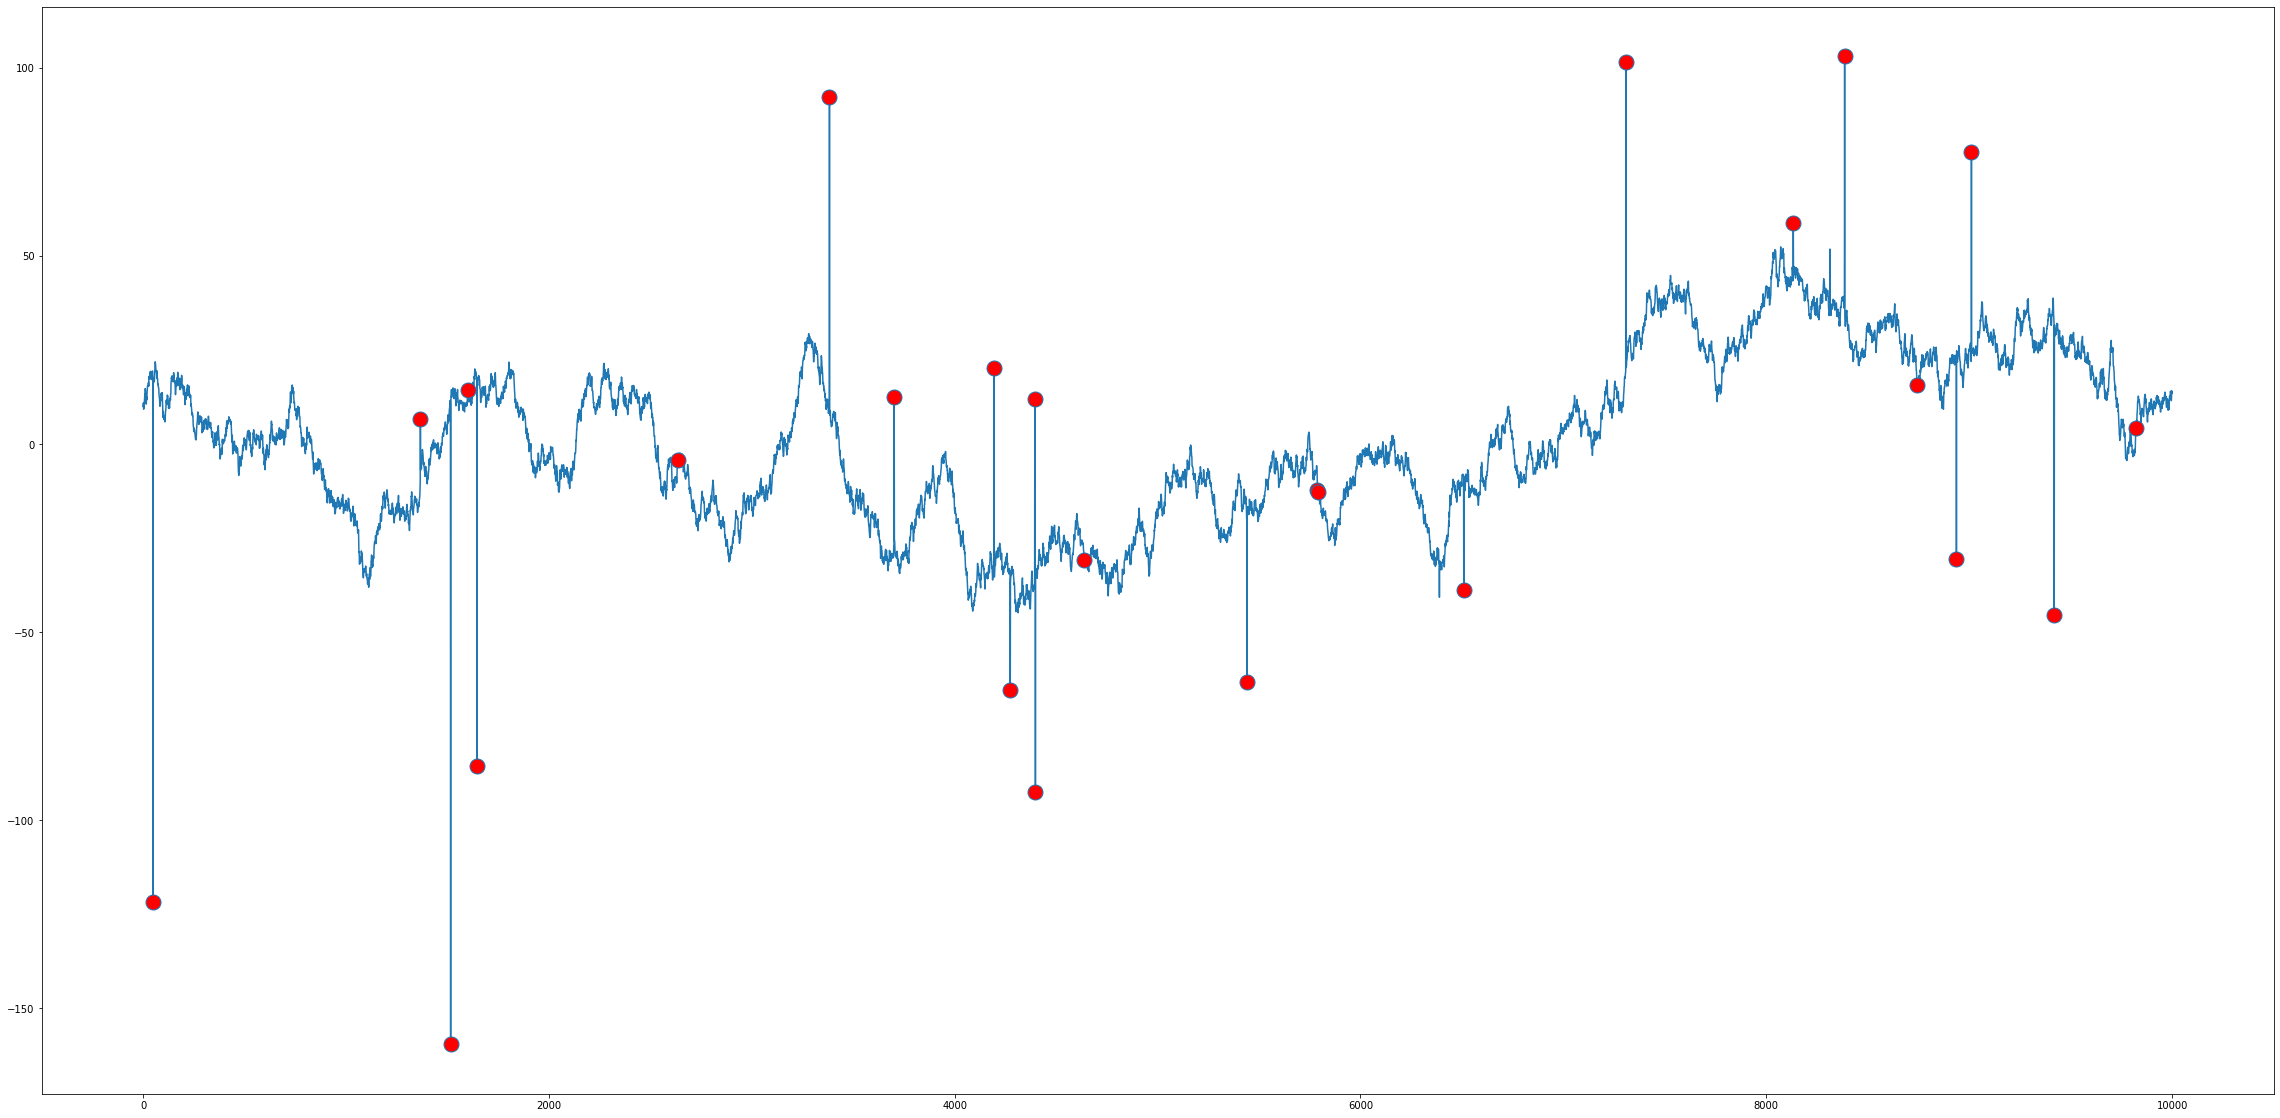

In [ ]:
plot_anomaly(DataDict,anomaly_times)

## eg, run the cell below after loading the "DataDict"
### Below is just an demo of how to use the plot function and what it returns
#### In final submission make sure you have generated the image with outliers marked as below

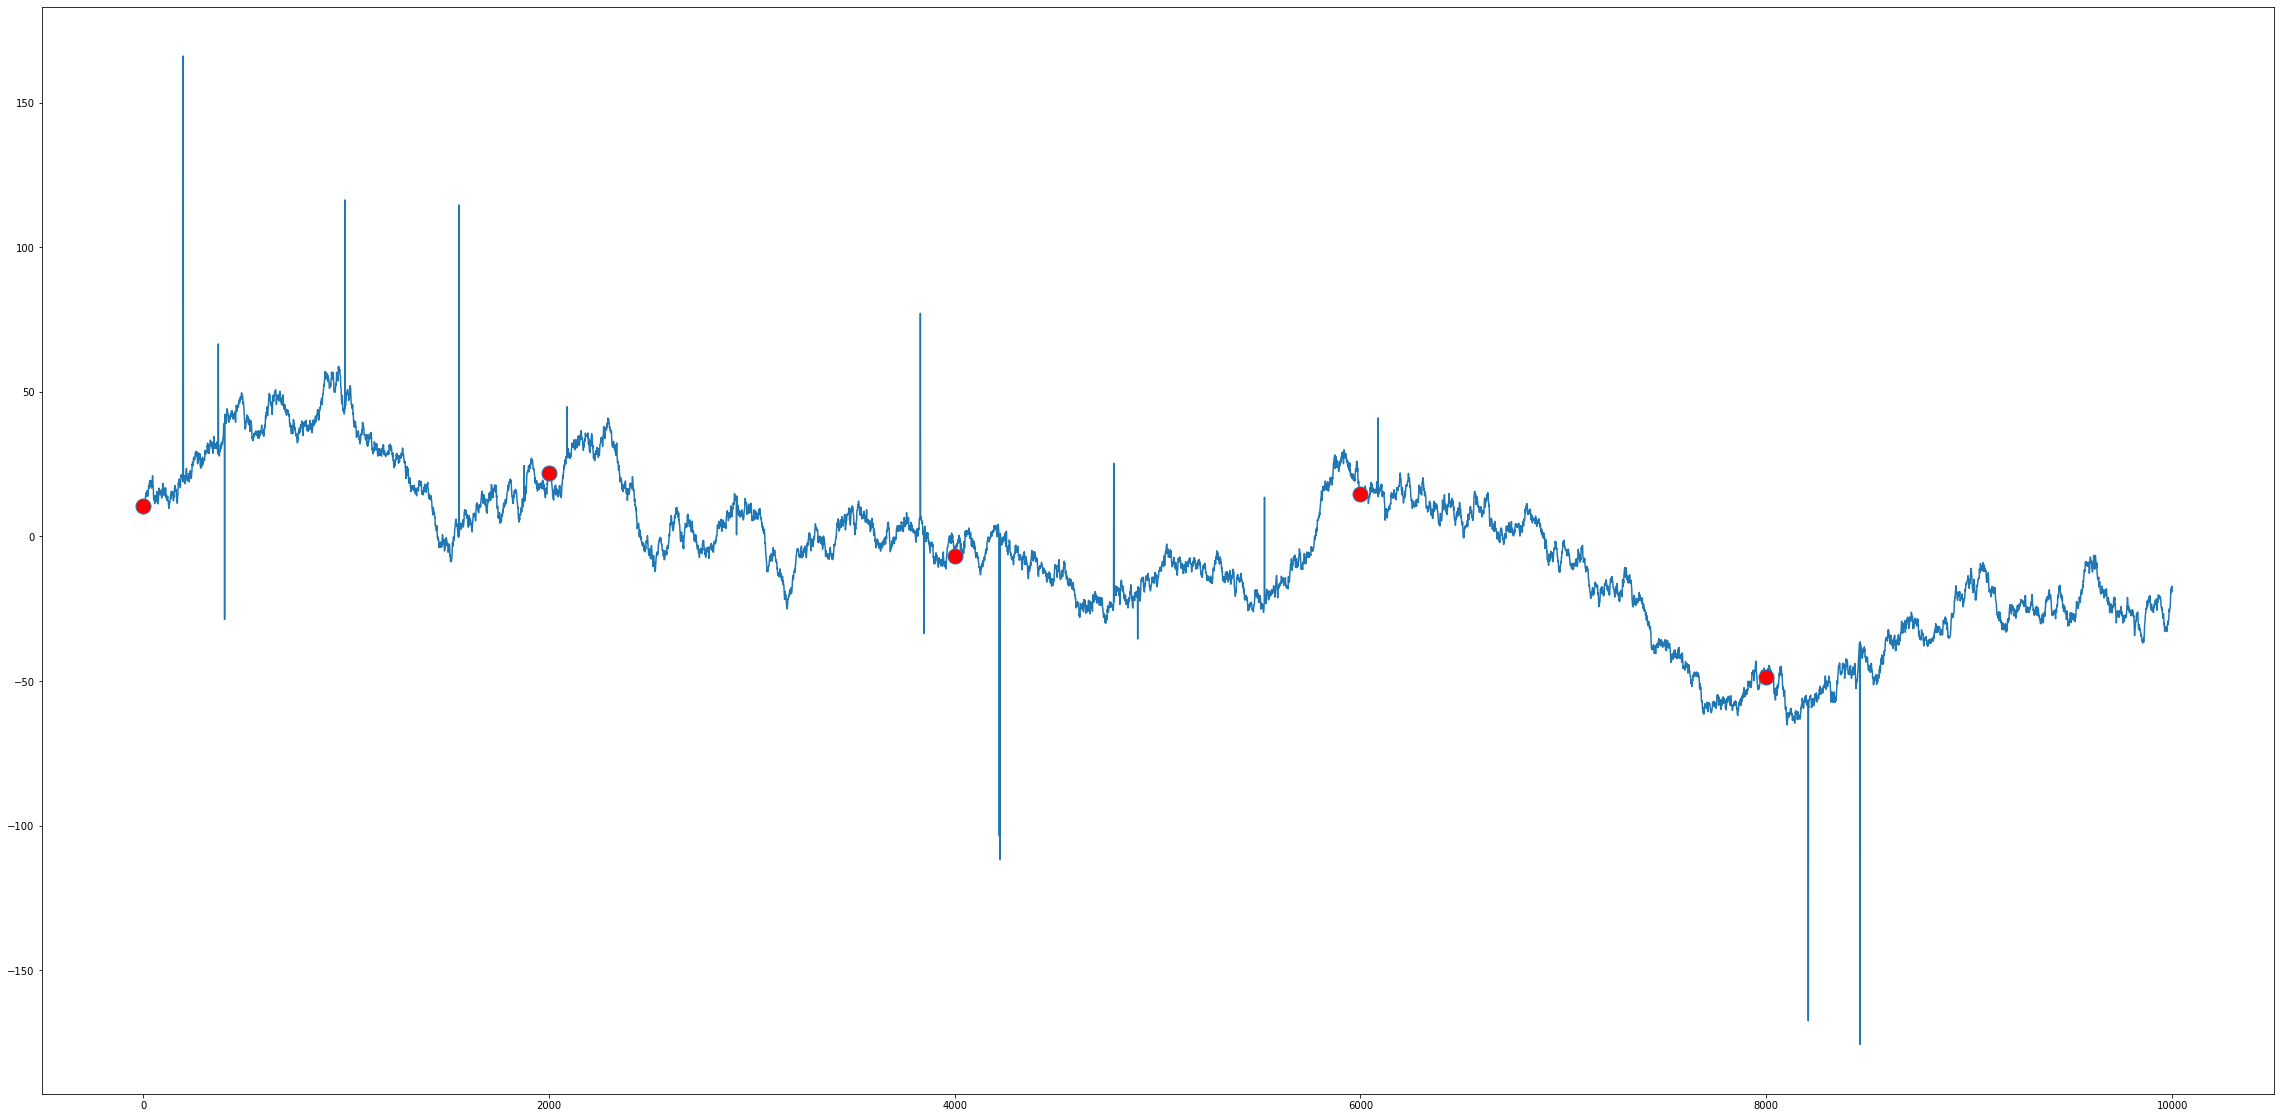

In [ ]:
eg_anomaly_times=[1,2000,4000,8000,6000]
plot_anomaly(DataDict,eg_anomaly_times)